In [113]:
# import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import unicodedata

In [114]:
from sklearn.utils import shuffle
df = pd.read_csv(r"C:\Users\Yashika\OneDrive\Desktop\Dissertation\data set\Final Dataset\Racial and ethical hate speech.csv")
df = df.sample(frac=1).reset_index(drop=True) #
df = df[['label','text']]
df = shuffle(df)  
#df['label'] =df['label'].map({ 'nothate':0, 'hate': 1})
df = df[['label','text']]
df.tail()

,label,text
16336,nothate,do you really know any who are agreeable? Seem...
16560,nothate,I think all americans need a geography lesson tbh
11998,hate,One of the most bosstastic Muslims of all time...
24649,nothate,You trainees are literally going to hang by yo...
21133,hate,"Yeah, leave those peaceful muslims alone, all ..."


In [115]:
def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')

def clean_stopwords_shortwords(w):
    stopwords_list=stopwords.words('english')
    words = w.split() 
    clean_words = [word for word in words if (word not in stopwords_list) and len(word) > 2]
    return " ".join(clean_words) 

def preprocess_sentence(w):
    pro = unicode_to_ascii(w.lower().strip())
    pro = re.sub(r"([?.!,¿])", r" ", w)
    pro = re.sub(r'[" "]+', " ", w)
    pro = re.sub(r"[^a-zA-Z?.!,¿]+", " ", w)
    pro=clean_stopwords_shortwords(w)
    pro=re.sub(r'@\w+', '',w)
    return pro
df['text']=df['text'].map(preprocess_sentence)

In [116]:
import pandas as pd
from sklearn.utils import resample

minority_class = df['label'].value_counts().idxmin()
print(minority_class)
# Separate majority and minority classes
majority_df = df[df['label'] != minority_class]
minority_df = df[df['label'] == minority_class]

# Downsample the majority class
majority_downsampled = resample(majority_df, replace=False, n_samples=len(minority_df), random_state=100)

# Combine the minority class DataFrame with the downsampled majority class DataFrame
balanced_df = pd.concat([majority_downsampled, minority_df])

# 'balanced_df' now contains a balanced dataset


hate


In [119]:
df = shuffle(balanced_df)  
balanced_df.tail()

,label,text
12707,hate,come holy day nazis pardoned liberals say back...
6983,hate,could jews downvoting jews hate named shamed
6072,hate,get weirded riding camel weird looking like ow...
11998,hate,one bosstastic muslims time kurd called saladi...
21133,hate,yeah leave peaceful muslims alone done behead ...


In [120]:
#creating a function to process the data
def data_processing(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"https\S+|www\S+http\S+", '', tweet, flags = re.MULTILINE)
    tweet = re.sub(r'\@w+|\#','', tweet)
    tweet = re.sub(r'[^\w\s]','',tweet)
    tweet = re.sub(r'ð','',tweet)
    tweet_tokens = word_tokenize(tweet)
    filtered_tweets = [w for w in tweet_tokens if not w in stop_words]
    return " ".join(filtered_tweets)

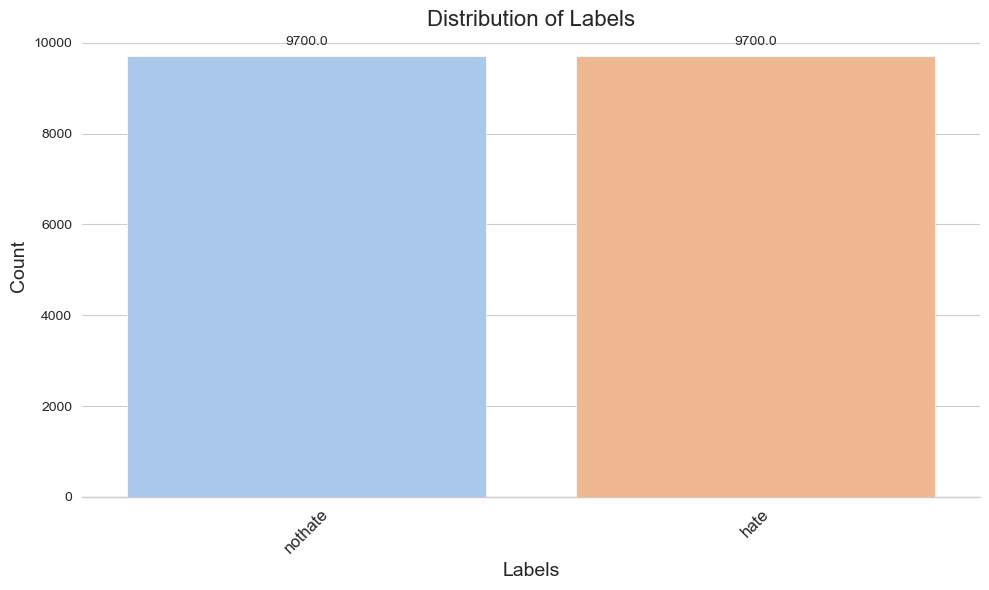

In [121]:

# Set a beautiful color palette
colors = sns.color_palette("pastel")

# Create a figure and axis object with Seaborn style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create the countplot
ax = sns.countplot(x='label', data=balanced_df, palette=colors)

# Set labels and title
ax.set_xlabel("Labels", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.set_title("Distribution of Labels", fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Customize other plot elements
sns.despine(left=True)
ax.yaxis.grid(True)

# Display count above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, xytext=(0, 10),
                textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()




In [122]:
balanced_df.text = balanced_df['text'].apply(data_processing)

In [123]:
balanced_df = df.drop_duplicates('text')

In [124]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    tweet = [lemmatizer.lemmatize(word) for word in data]
    return data

In [125]:
balanced_df['text'] = balanced_df['text'].apply(lambda x: lemmatizing(x))

C:\Users\Yashika\AppData\Local\Temp\ipykernel_11732\1392213241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balanced_df['text'] = balanced_df['text'].apply(lambda x: lemmatizing(x))


In [128]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19151 entries, 25741 to 13775
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   19151 non-null  object
 1   text    19151 non-null  object
dtypes: object(2)
memory usage: 448.9+ KB


In [55]:
#unique_count = df['target'].nunique()
#print("Count of unique values in 'target' column:", unique_count)

In [129]:
non_hate_tweets = df[df.label == 'nothate' ]
df.head(5)

,label,text
25741,hate,cant imagine frustrating must kikes hate born ...
15757,nothate,hate black cab drivers
13622,hate,bro like appreciate content respect honesty se...
5022,hate,genuinely fucking hate jews palestinians kille...
3162,nothate,fuck hate girlfriend


,label,text


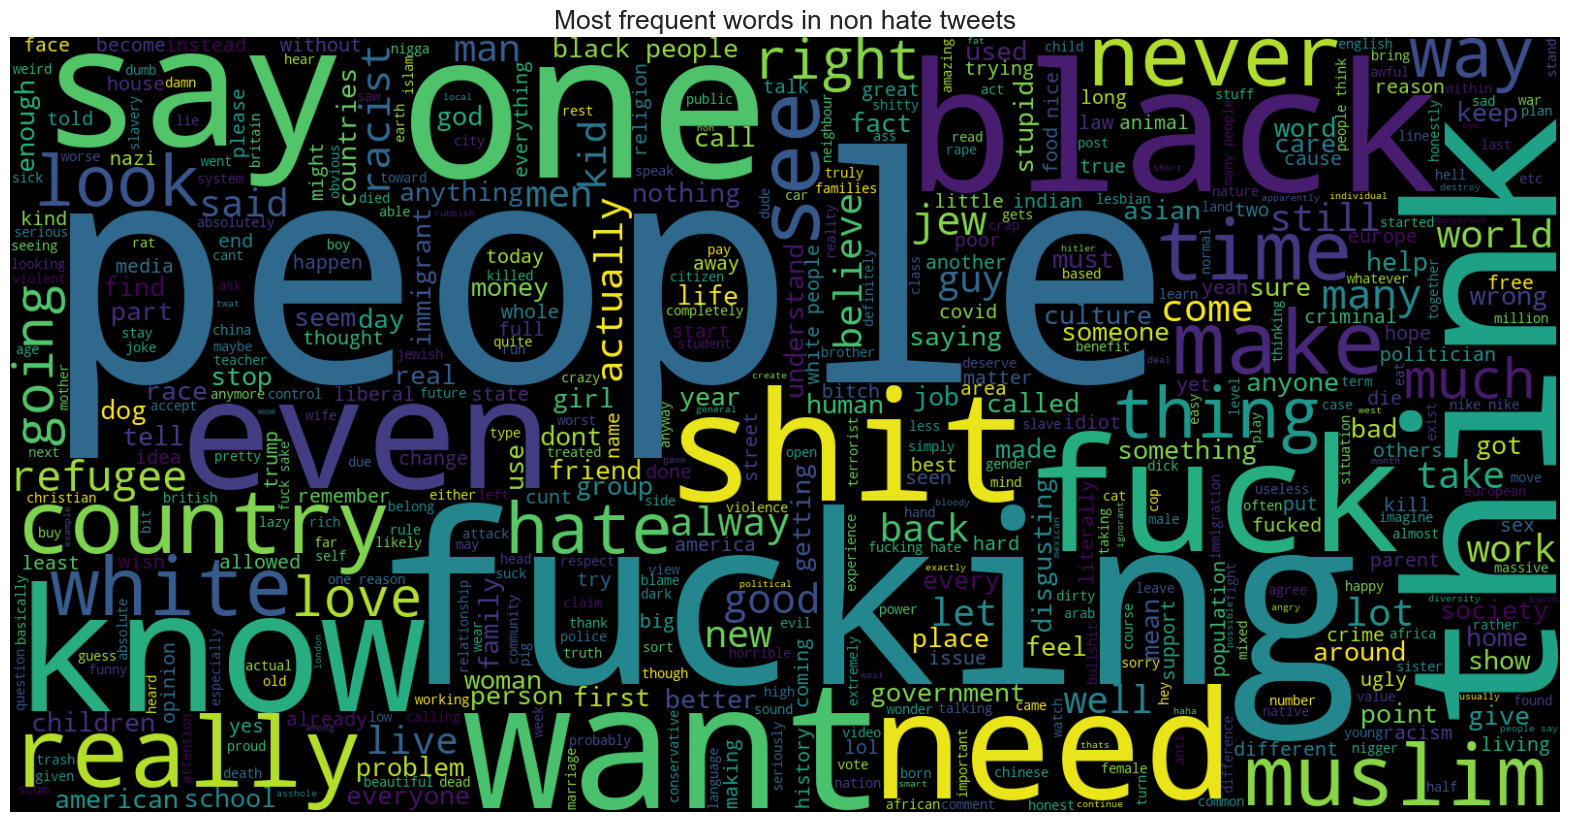

In [130]:
text = ' '.join([word for word in non_hate_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in non hate tweets', fontsize = 19)
plt.show()

In [131]:
neg_tweets = balanced_df[df.label == 'hate']
neg_tweets.head()

C:\Users\Yashika\AppData\Local\Temp\ipykernel_11732\621928334.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  neg_tweets = balanced_df[df.label == 'hate']


,label,text
25741,hate,cant imagine frustrating must kikes hate born ...
13622,hate,bro like appreciate content respect honesty se...
5022,hate,genuinely fucking hate jews palestinians kille...
18847,hate,mexico moment contention africa saudi arabia b...
3388,hate,niggers kill


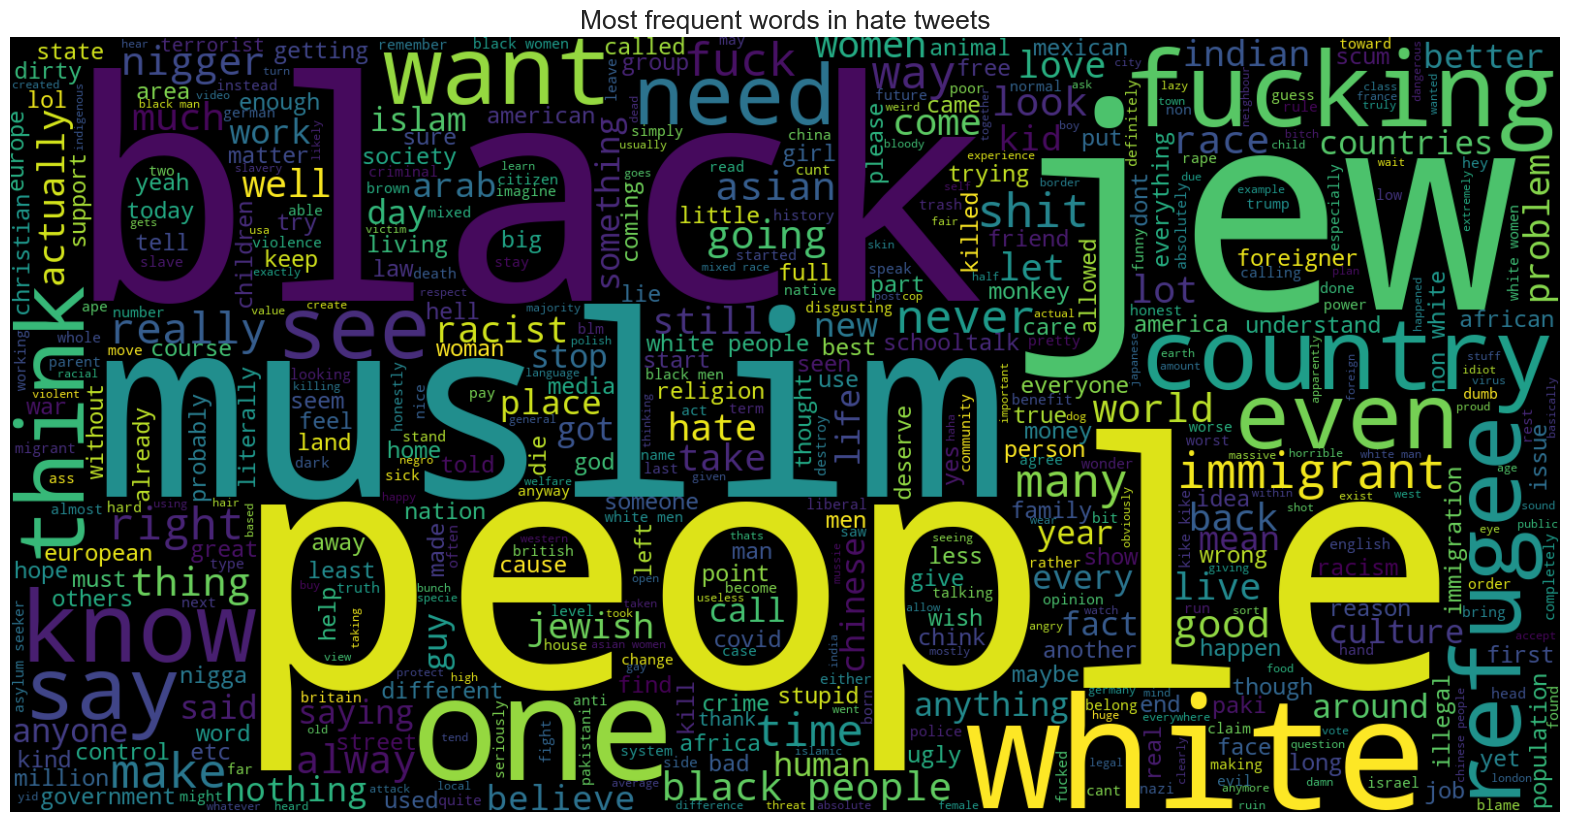

In [132]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in hate tweets', fontsize = 19)
plt.show()

In [133]:
vect = TfidfVectorizer(ngram_range=(1,2)).fit(balanced_df['text'])

In [136]:
X = balanced_df['text']
Y = balanced_df['label']
X = vect.transform(X)

In [137]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [138]:
print((x_train.shape))
print((y_train.shape))
print((x_test.shape))
print((y_test.shape))

(15320, 352314)
(15320,)
(3831, 352314)
(3831,)


In [139]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_predict, y_test)
print("Test accuarcy: {:.2f}%".format(logreg_acc*100))

Test accuarcy: 60.87%


In [140]:
print(confusion_matrix(y_test, logreg_predict))
print("\n")
print(classification_report(y_test, logreg_predict))

[[1155  766]
 [ 733 1177]]


              precision    recall  f1-score   support

        hate       0.61      0.60      0.61      1921
     nothate       0.61      0.62      0.61      1910

    accuracy                           0.61      3831
   macro avg       0.61      0.61      0.61      3831
weighted avg       0.61      0.61      0.61      3831



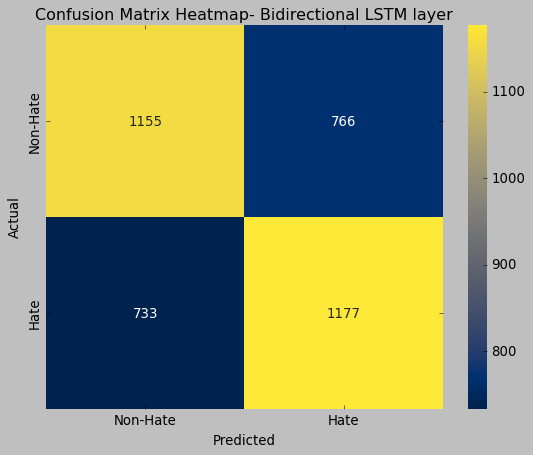

In [150]:
# Create a heatmap with a custom colormap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', 
            xticklabels=['Non-Hate', 'Hate'], yticklabels=['Non-Hate', 'Hate'],
            cmap='cividis')  # You can change the colormap (e.g., 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap- Bidirectional LSTM layer')
plt.show()

In [146]:
print (conf_matrix)

[[1155  766]
 [ 733 1177]]
